/Users/stefanobutera/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/stefanobutera/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


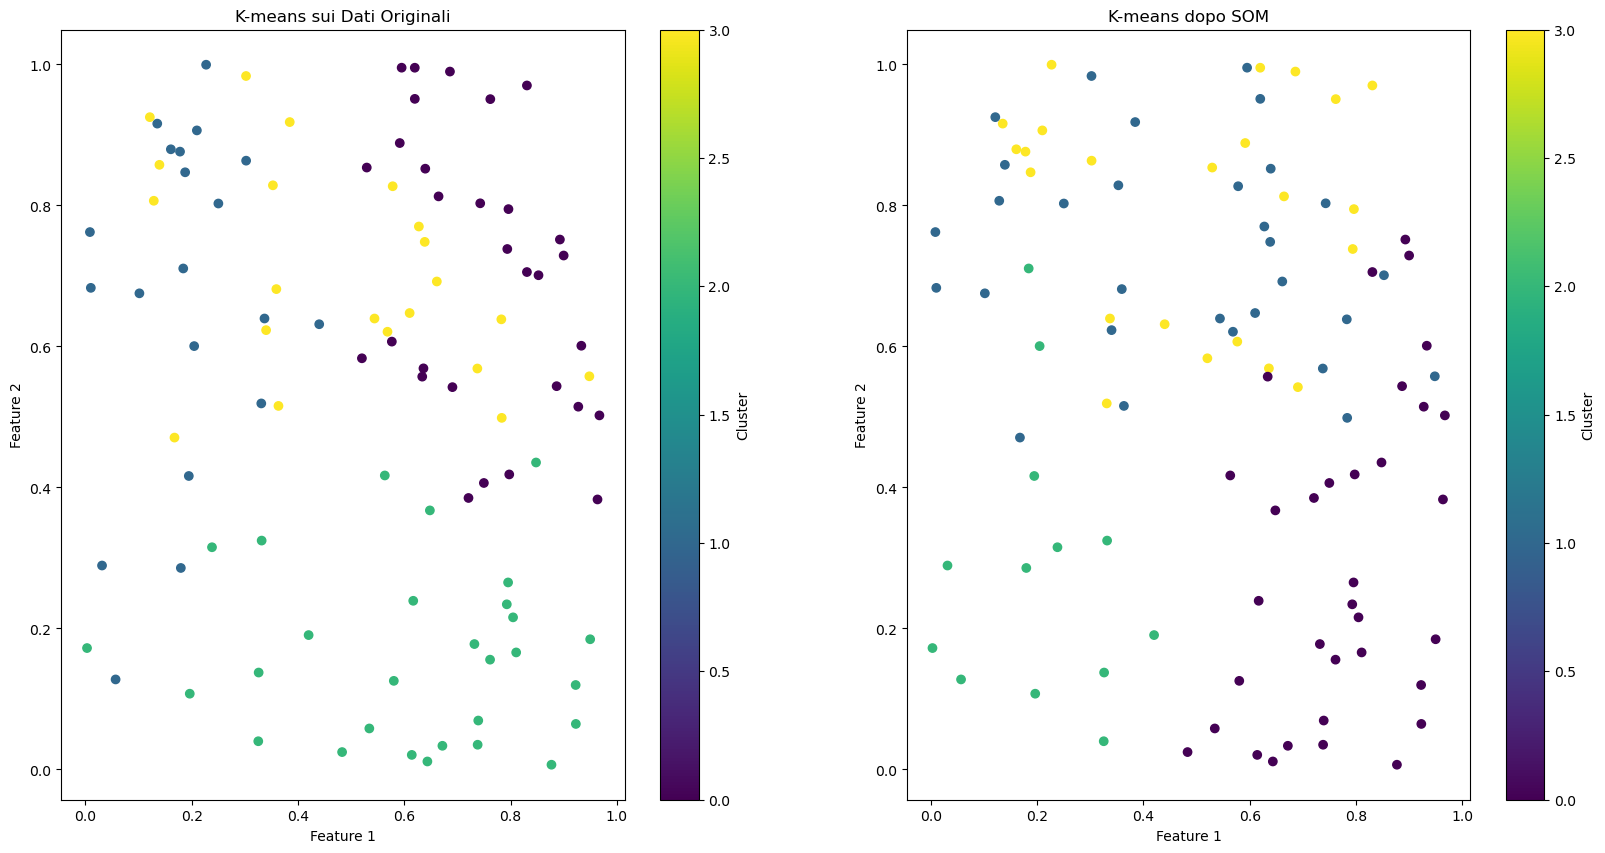

' questo è solo un esempio al volo necessita di fine tunining al termine del quale sarebbe interessante osservare se\n    la maggior complessità aggiunta dalla SOM porta ad un effetivo beneficio '

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from minisom import MiniSom

# Creazione dei dati di esempio
data = np.random.rand(100, 3)  # 100 campioni di dati a 3 dimensioni

# Applicazione di K-means sui dati originali
kmeans_original = KMeans(n_clusters=4)
kmeans_original.fit(data)
labels_original = kmeans_original.labels_

# Parametri della SOM
som_width = 10
som_height = 10
input_len = data.shape[1]  # Dimensione dei dati di input

# Inizializzazione e addestramento della SOM
som = MiniSom(x=som_width, y=som_height, input_len=input_len, sigma=1.0, learning_rate=0.5)
som.random_weights_init(data)
som.train_random(data, num_iteration=100)

# Estrazione dei pesi della SOM
weights = som.get_weights().reshape(-1, input_len)

# Applicazione di K-means sui pesi della SOM
kmeans_som = KMeans(n_clusters=4)
kmeans_som.fit(weights)
labels_som = kmeans_som.predict(weights)

# Mappatura dei cluster ai dati originali
data_labels = []
for sample in data:
    winner = som.winner(sample)
    weight_idx = winner[0] * som_width + winner[1] # winner restituisce una cordinata in questo modo converto in lineare
    data_labels.append(labels_som[weight_idx])

data_labels = np.array(data_labels)

# Visualizzazione dei risultati di K-means sui dati originali
plt.figure(figsize=(20, 10))  # Imposta la dimensione della figura

plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c=labels_original, cmap='viridis')
plt.title('K-means sui Dati Originali')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')

# Visualizzazione dei risultati di K-means dopo SOM
plt.subplot(1, 2, 2)
plt.scatter(data[:, 0], data[:, 1], c=data_labels, cmap='viridis')
plt.title('K-means dopo SOM')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')

plt.show()

""" questo è solo un esempio al volo necessita di fine tunining al termine del quale sarebbe interessante osservare se
    la maggior complessità aggiunta dalla SOM porta ad un effetivo beneficio
    
"""


In [2]:
! pip install minisom
! pip install KMeans

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.2-py3-none-any.whl size=10651 sha256=70c270200799c84fb52a9bd93b70d44b062ec34c3ec3548d8870393e34766fa5
  Stored in directory: /Users/stefanobutera/Library/Caches/pip/wheels/8f/27/d8/3b73a7a174e55087f3133c7592f224fdd77d746bccd441fbec
Successfully built minisom
  Preparing metadata (setup.py) ... done
  Created wheel for KMeans: filename=kmeans-1.0.2-cp310-cp310-macosx_11_0_arm64.whl size=8634 sha256=8ce533067c8cf41a011b5b4652d6cdcdb0df1a2d843545092f9a46855e59d903
  Stored in directory: /Users/stefanobutera/Library/Caches/pip/wheels/1a/bd/5a/7d0c425b453124d35363b21d450ea738b09b3d1a5b2abdf4ab
Successfully built KMeans
